In [152]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
import SimpleITK as sitk


In [154]:
pick_read = open('cnn.pkl','rb')
model = pickle.load(pick_read)
pick_read.close()

In [155]:
type(model)

keras.engine.sequential.Sequential

In [156]:
def predict_one_image(model, path):
    labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
    img = load_img(path, target_size=(256, 256))
    plt.imshow(img)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return labels[model.predict(img).argmax()]

1/1 [==============================] - 1s 536ms/step


'No Tumor'

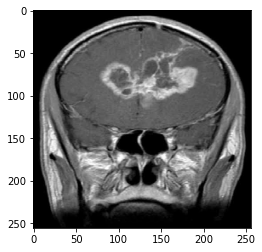

In [157]:
predict_one_image(model, 'data/Testing/glioma_tumor/image.jpg')

1/1 [==============================] - 0s 66ms/step


'No Tumor'

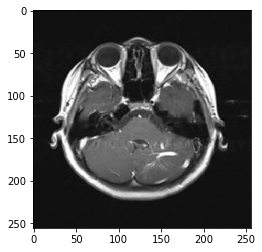

In [158]:
predict_one_image(model, 'data/Testing/no_tumor/image.jpg')

1/1 [==============================] - 0s 77ms/step


'Meningioma'

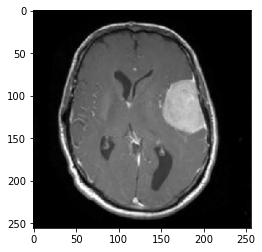

In [159]:
predict_one_image(model, 'data/Testing/meningioma_tumor/image.jpg')

1/1 [==============================] - 0s 68ms/step


'Pituitary'

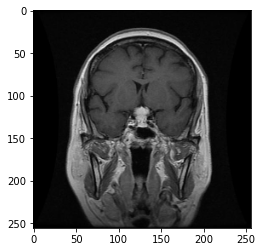

In [160]:
predict_one_image(model, 'data/Testing/pituitary_tumor/image.jpg')

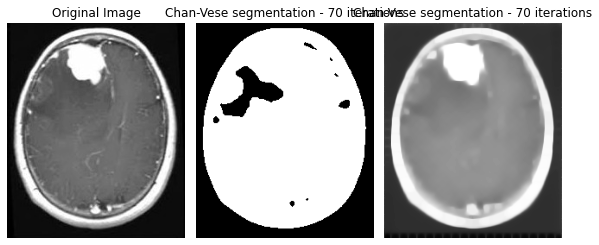

In [161]:
image = plt.imread('data/Testing/meningioma_tumor/image(112).jpg')
# Converting image to grayscale
image = 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 2]

image = img_as_float(image)

cv = chan_vese(image, mu=0.5, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=100, dt=0.5, init_level_set="checkerboard",
               extended_output=True)


fig, axes = plt.subplots(nrows = 1, ncols=3, figsize=(8, 8))


axes[0].imshow(image, cmap="gray")
axes[0].set_axis_off()
axes[0].set_title("Original Image", fontsize=12)

axes[1].imshow(cv[0], cmap="gray")
axes[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
axes[1].set_title(title, fontsize=12)

axes[2].imshow(cv[1], cmap="gray")
axes[2].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
axes[2].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

In [162]:
!pip install -U notebook-as-pdf


     |████████████████████████████████| 83 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 222 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 11.7 MB/s eta 0:00:01
